In [2]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/nyc.csv", encoding='latin1')
del df0['Case']
df = sm.add_constant(df0)
df.tail()

,const,Restaurant,Price,Food,Decor,Service,East
163,1.0,Baci,31,17,15,16,0
164,1.0,Puccini,26,20,16,17,0
165,1.0,Bella Luna,31,18,16,17,0
166,1.0,Métisse,38,22,17,21,0
167,1.0,Gennaro,34,24,10,16,0


# 1. 선형회귀모형 만들기(스테츠모델은 아래에 있음)

In [4]:
from sklearn.linear_model import LinearRegression
dfX=pd.DataFrame(df, columns=['Food', 'Decor', 'Service', 'East'])
dfy=df[["Price"]]
model = LinearRegression(fit_intercept=True)
model_NY = model.fit(dfX,dfy)

In [5]:
model_NY.coef_

array([[ 1.53811994,  1.91008711, -0.00272748,  2.06805016]])

In [6]:
model_NY.intercept_

array([-24.02379967])

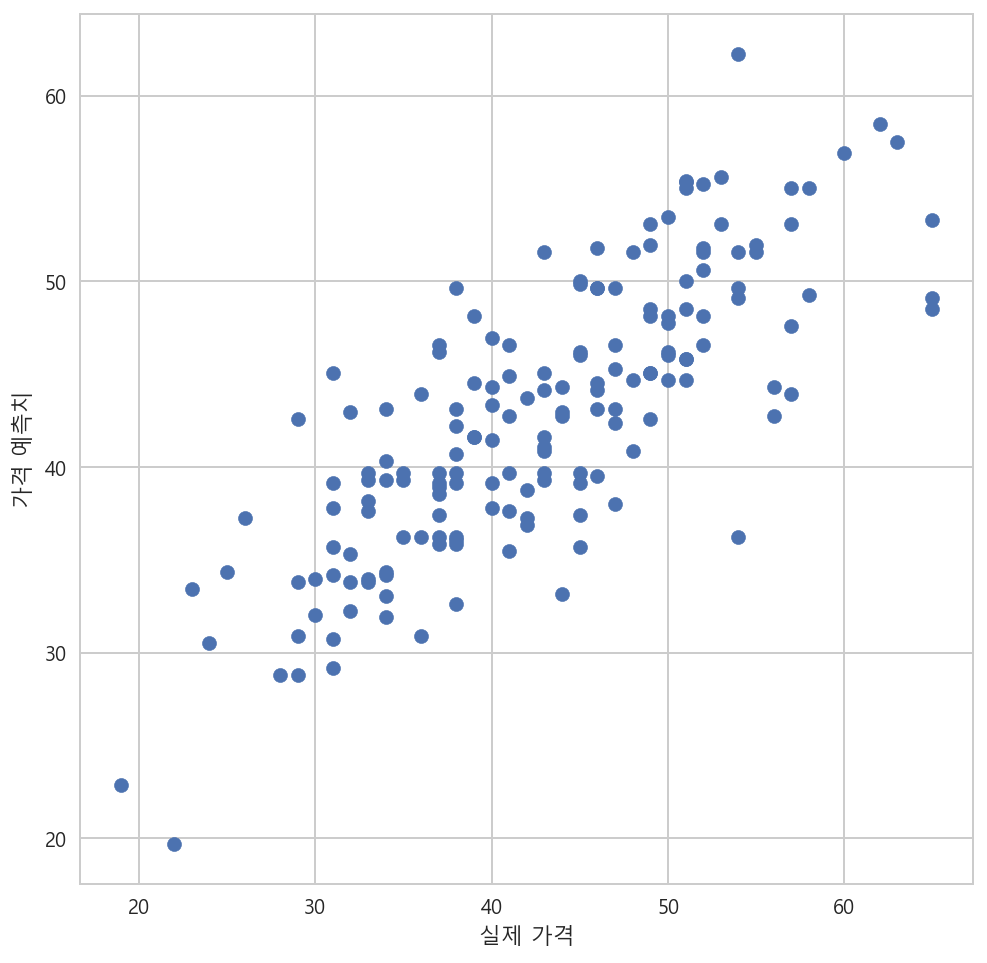

In [7]:
predictions = model_NY.predict(dfX)

plt.figure(figsize=(8,8))
plt.scatter(df["Price"], predictions)
plt.xlabel(u"실제 가격")
plt.ylabel(u"가격 예측치")
plt.show()

# 2. 가격에 가장 큰 영향을 미치는 변수는?
> 답 : Decor , 유의하다

In [8]:
import statsmodels.api as sm

# dfX2 = sm.add_constant(dfX) #바이어스오그멘테이션

model_NY2 = sm.OLS(df[["Price"]], df[['const','Food', 'Decor', 'Service', 'East']])
result_NY2 = model_NY2.fit()
print(result_NY2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Sat, 30 Jun 2018   Prob (F-statistic):           5.35e-34
Time:                        00:20:25   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.0238      4.708     -5.102      0.0

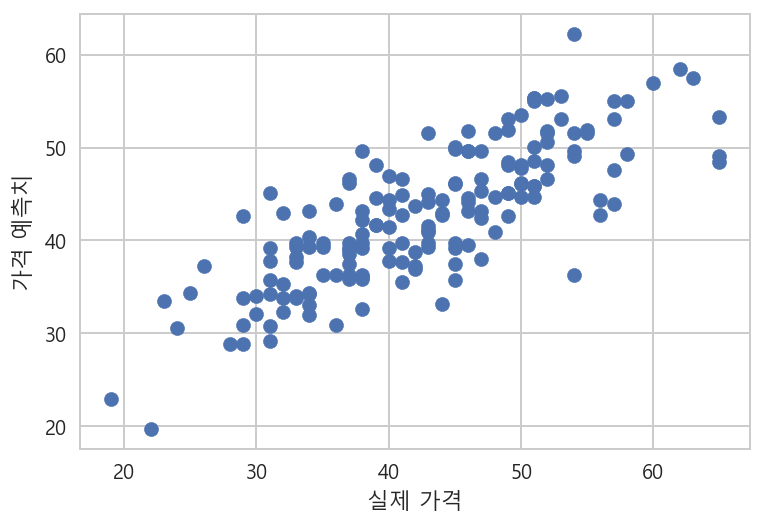

In [11]:
dfy_new = result_NY2.predict(df[['const','Food', 'Decor', 'Service', 'East']])

plt.scatter(df[["Price"]], dfy_new)
plt.xlabel(u"실제 가격")
plt.ylabel(u"가격 예측치")
plt.show()

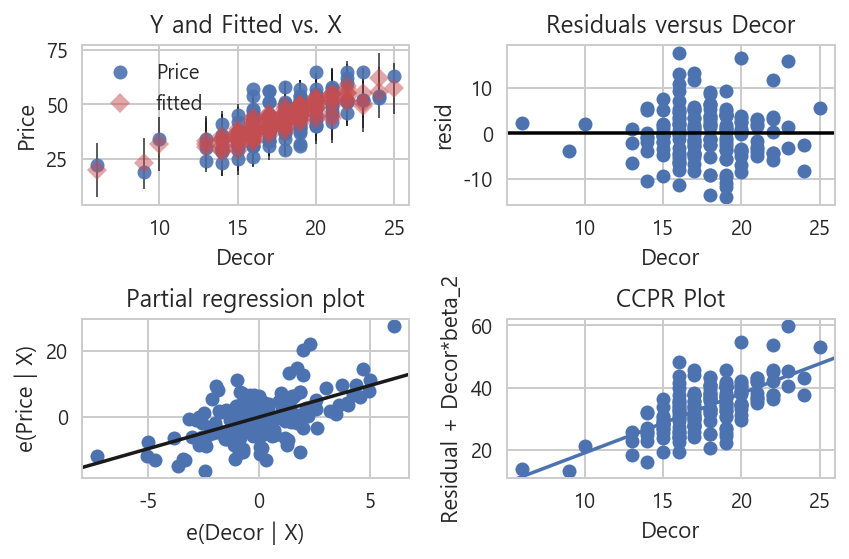

In [12]:
fig = sm.graphics.plot_regress_exog(result_NY2, "Decor")
fig.suptitle("")
plt.show()

# 3. 식당위치는 가격에 영향을 미치는가?
> 답 : 약간 영향을 미친다. 약 1~3달러정도 차이난다.

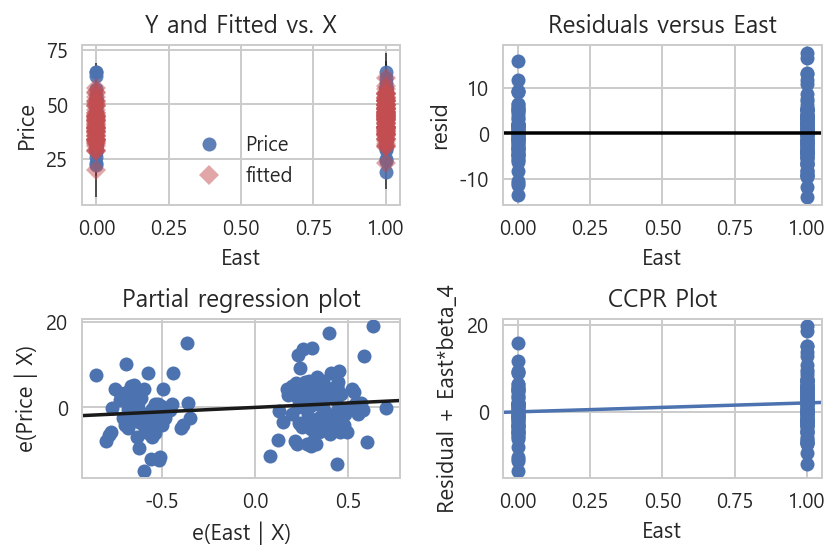

In [13]:
fig = sm.graphics.plot_regress_exog(result_NY2, "East")
fig.suptitle("")
plt.show()

# 4. 통계적으로 유의하지 않는 변수는?
> 답 : Service. 유의수준을 벗어난다

# 5. 모형2를 다시 만들어라

In [43]:
dfXt=pd.DataFrame(df, columns=['Food', 'Decor', 'East'])
dfy=df["Price"]


model_NY3 = sm.OLS(df[["Price"]], df[['Food', 'Decor', 'East']])
result_NY3 = model_NY3.fit()
print(result_NY3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2775.
Date:                Sat, 30 Jun 2018   Prob (F-statistic):          6.49e-141
Time:                        00:43:56   Log-Likelihood:                -541.91
No. Observations:                 168   AIC:                             1090.
Df Residuals:                     165   BIC:                             1099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Food           0.4913      0.180      2.735      0.0

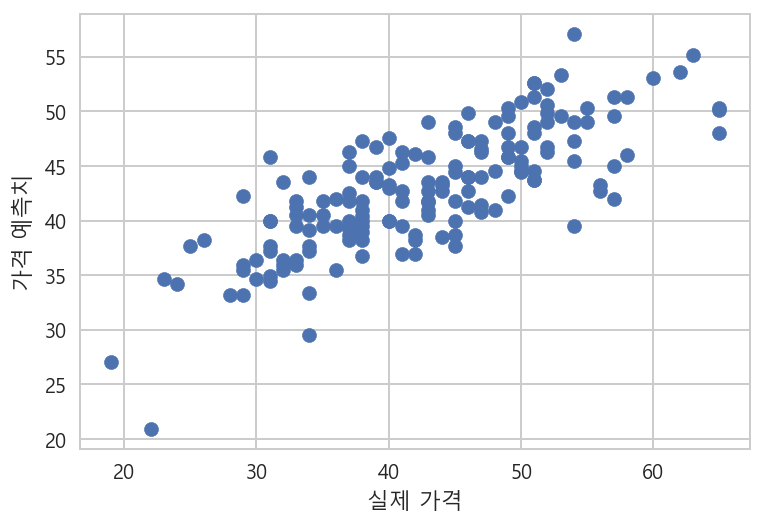

In [44]:
dfy_new3 = result_NY3.predict(df[['Food', 'Decor', 'East']])

plt.scatter(df[["Price"]], dfy_new3)
plt.xlabel(u"실제 가격")
plt.ylabel(u"가격 예측치")
plt.show()

# 비교결과 스캐터플롯은 이전과 거의 비슷하다.

# 6. food=20, decor=20, serivice=20, east=1 예측하라

In [47]:
dfx_new = pd.DataFrame([[1,20,20,20,1]],
                       columns=['const','Food', 'Decor', 'Service', 'East'])
dfx_new

,const,Food,Decor,Service,East
0,1,20,20,20,1


In [49]:
result_NY2.predict(dfx_new)

0    46.953842
dtype: float64

# 7. 모형2를 이용하여 아웃라이어인 식당을 구해서 표시하라

In [56]:
idx = result_NY3.resid_pearson > 2
df[idx]

,const,Restaurant,Price,Food,Decor,Service,East
29,1.0,Harry Cipriani,65,21,20,20,1
44,1.0,Bravo Gianni,56,22,17,21,1
47,1.0,Il Valletto Due Mila,56,21,17,20,1
55,1.0,Nello,54,18,16,15,1
102,1.0,Rao's,57,23,16,20,1
129,1.0,Rainbow Grill,65,19,23,18,0
131,1.0,San Domenico,65,23,22,22,0


In [50]:
Pricepdt = result_NY3.predict(df[["Food","Decor","East"]])

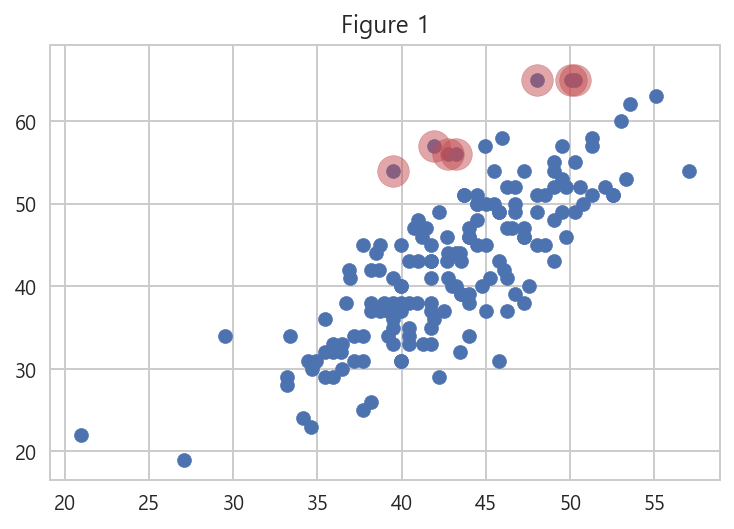

In [51]:
plt.scatter(Pricepdt, df.Price)
plt.scatter(Pricepdt[idx], df[idx].Price, s=250, c='r', alpha=0.5)
plt.title("Figure 1")
plt.show()


# 8. 모형2를 이용해서 레버리지가 큰 데이터를 구해라
 - (레버리지3배이상)

<Container object of 3 artists>

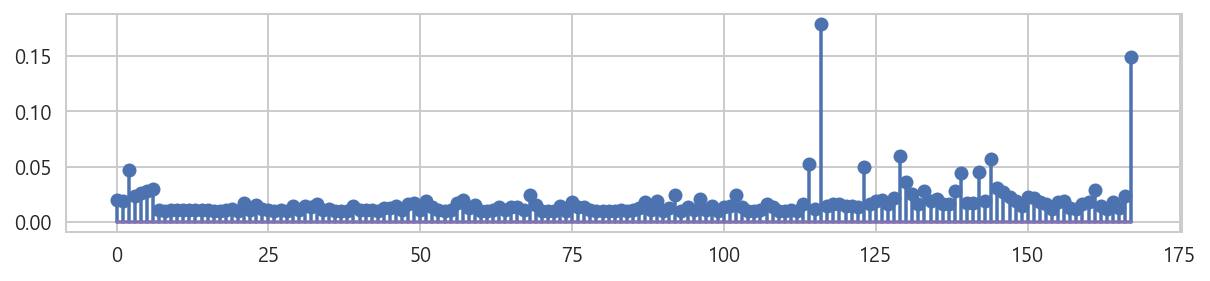

In [52]:
influence = result_NY3.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10,2))
plt.stem(hat)


In [54]:
idx = hat > 3 * hat.mean()
df[idx]

,const,Restaurant,Price,Food,Decor,Service,East
116,1.0,Veronica,22,21,6,14,0
129,1.0,Rainbow Grill,65,19,23,18,0
144,1.0,Palio,63,22,25,22,0
167,1.0,Gennaro,34,24,10,16,0


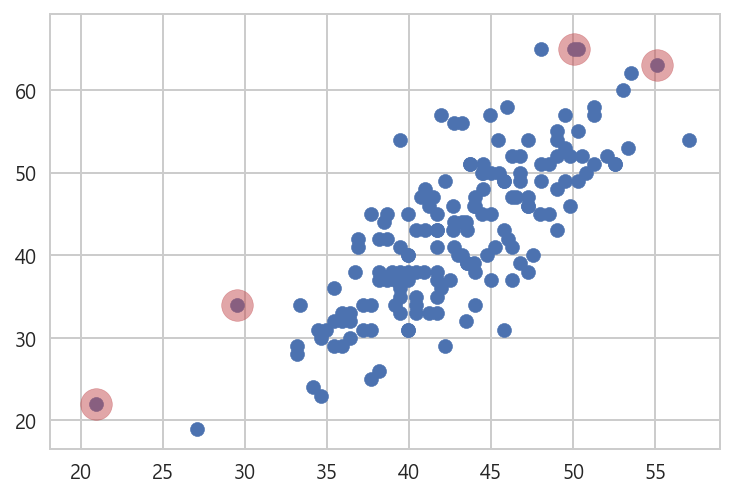

In [55]:
ax = plt.subplot()
plt.scatter(Pricepdt, df.Price)
# sm.graphics.abline_plot(model_results=result_NY3, ax=ax)

plt.scatter(Pricepdt[idx], df[idx].Price, s=250, c="r", alpha=0.5)
plt.show()

# 9. cook's distance가 큰 데이터 구하기
- fox' Outlier Recommendation 사용

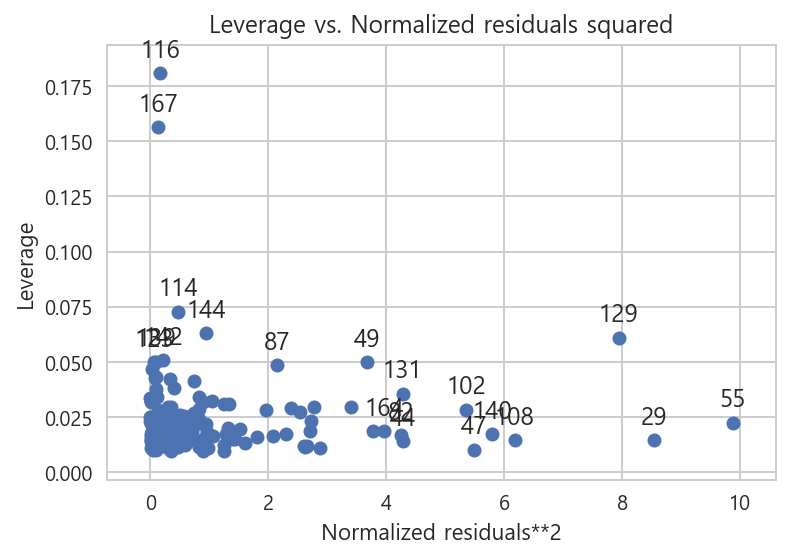

In [127]:
sm.graphics.plot_leverage_resid2(result_NY3)
plt.show()

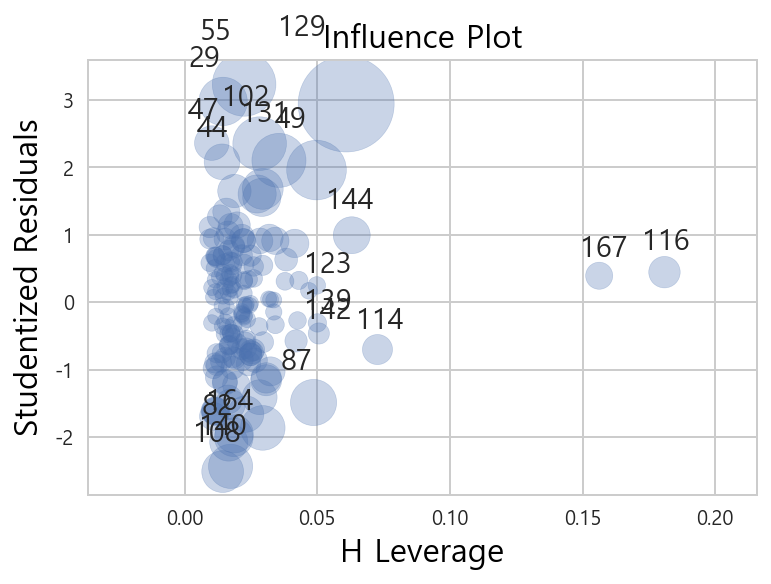

In [128]:
sm.graphics.influence_plot(result_NY3, plot_alpha=0.3)
plt.show()

In [57]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df) - 4 - 1)
idx3 = cooks_d2 > fox_cr

df[idx3]

,const,Restaurant,Price,Food,Decor,Service,East
29,1.0,Harry Cipriani,65,21,20,20,1
102,1.0,Rao's,57,23,16,20,1
108,1.0,Casa Mia,31,20,19,19,1
114,1.0,Lamarca,19,18,9,15,1
129,1.0,Rainbow Grill,65,19,23,18,0
131,1.0,San Domenico,65,23,22,22,0
138,1.0,Rino Trattoria,23,20,14,16,0
140,1.0,Trattoria Del Sogno,29,21,18,19,0
144,1.0,Palio,63,22,25,22,0
151,1.0,Il Tinello,57,23,19,23,0


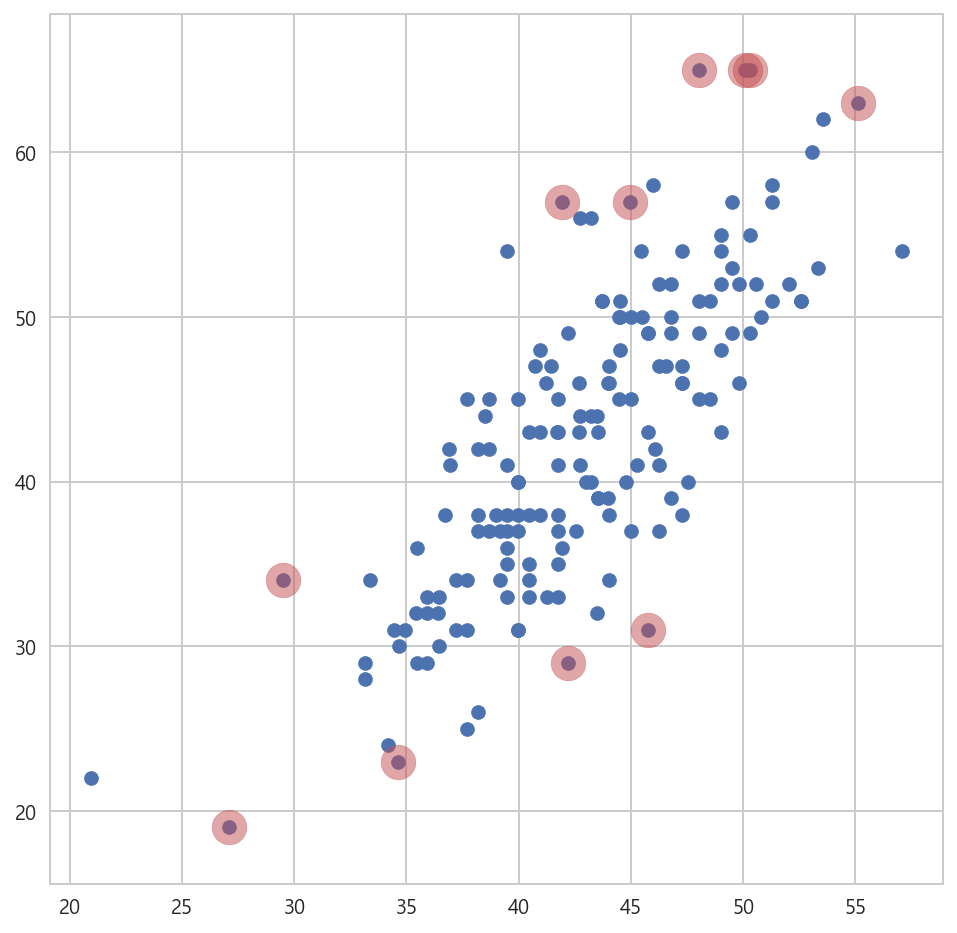

In [59]:
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.scatter(Pricepdt, df.Price)
plt.scatter(Pricepdt[idx3], df[idx3].Price, s=300, c="r", alpha=0.5)
# utils.annotate_axes(range(len(idx3)), idx3, 
#                     list(zip(dfy[idx3], dfy_new3[idx3])), [(-20, 15)] * len(idx3), size="small", ax=ax)
plt.show()